# Regressão Linear

Se temos um conjunto de dados e queremos prever o valor de uma variável dependente (Y) com base em uma ou mais variáveis independentes (X), podemos usar a regressão linear.

Em um conjunto de pontos de dados, o que é uma linha de melhor ajuste?
Uma linha que passa pela maioria dos pontos de dados. A regressão linear é um método estatístico que tenta encontrar a linha de melhor ajuste para um conjunto de pontos de dados.
Como pode ser definida qual a melhor reta de ajuste?
A melhor reta de ajuste é aquela que minimiza a soma dos quadrados das distâncias entre os pontos de dados e a reta. Ou seja, a melhor reta é aquela que minimiza a soma dos quadrados dos erros.

In [ ]:
import pandas as pd
#criando dados para um exemplo
dados = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


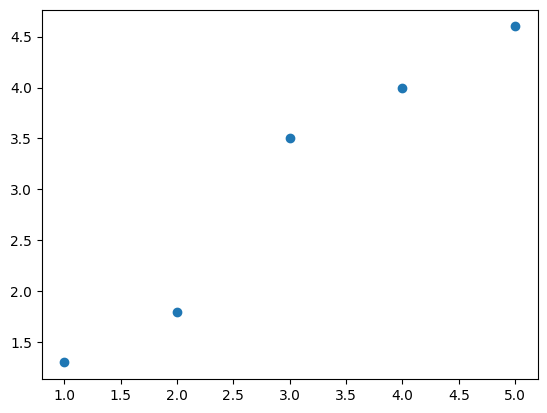

In [ ]:
#plotando os dados definidos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

plt.show()

In [5]:
#Traçando uma reta y=x
dados["y_reta"] = dados.X
dados.head()

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.6,5


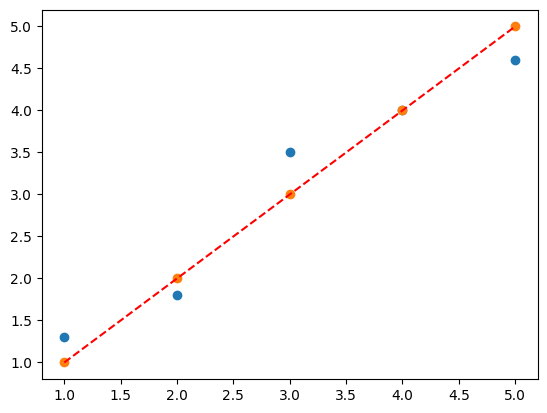

In [7]:
#plotando os dados agora com a reta y=x
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')
ax.scatter(dados.X,dados.y_reta,)
plt.show()

Essa definitivamente não é a melhor maneira de fazer isso, é a maneira mais simples mas não é a melhor. Vamos ver como fazer isso com regressão linear e como calcular o erro.

In [10]:
#fazendo o reshape dos arrays 1d para 2d para ajustar aos parametros da função 
# de regressão linear

dados.X.values.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [12]:
#importando a regressão linear
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(dados.X.values.reshape(-1,1),dados.Y)
#este regressor(regressor linear) vai ser o nosso modelo, ja com o fit dos dados que usaremos


In [15]:
#Coeficiente angular
a = reg.coef_

In [16]:
#coeficiente linear
b = reg.intercept_

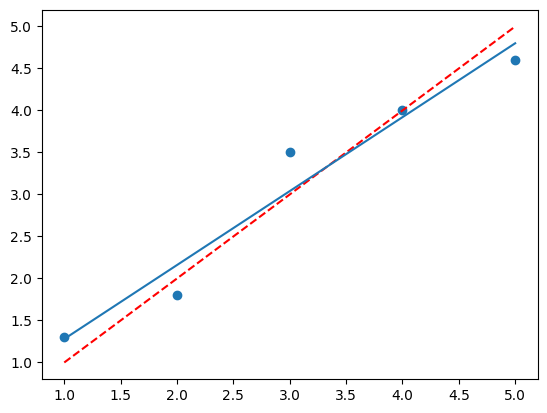

In [ ]:
#visualizando graficamente com os coeficientes da ref
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')

x = dados.X.values
y = a*x+b
ax.plot(x,y)

plt.show()

A reta gerada pela regressão(a azul), é a reta que melhor se aplica aos dados.

In [20]:
# fazendo previsões e adicionando na base de dados
dados['y_pred']=reg.predict(dados.X.values.reshape(-1,1))

In [21]:
dados

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [25]:
#Calculando o erro da reta vermelha e da regressão linear
dados['erro_reta']=(dados.Y-dados.y_reta)**2
dados['erro_pred']=(dados.Y-dados.y_pred)**2


In [26]:
dados

,X,Y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.28,0.09,0.0004
1,2,1.8,2,2.16,0.04,0.1296
2,3,3.5,3,3.04,0.25,0.2116
3,4,4.0,4,3.92,0.00,0.0064
4,5,4.6,5,4.80,0.16,0.0400


In [27]:
#verificando a base e a soma do erro
dados[['erro_reta','erro_pred']].sum()

erro_reta    0.540
erro_pred    0.388
dtype: float64

In [28]:
#podemos usar os metodos de calculo de erro do sklearn

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
print("Erros da reta")
print("Erro medio absoluto: ",mean_absolute_error(dados.Y,dados.y_reta))
print("Erro medio quadratico: ",mean_squared_error(dados.Y,dados.y_reta))
print("Erros da predição")
print("Erro medio absoluto: ",mean_absolute_error(dados.Y,dados.y_pred))
print("Erro medio quadratico: ",mean_squared_error(dados.Y,dados.y_pred))

Erros da reta
Erro medio absoluto:  0.2800000000000001
Erro medio quadratico:  0.10800000000000005
Erros da predição
Erro medio absoluto:  0.22400000000000003
Erro medio quadratico:  0.07760000000000003


# Usando a regressão linear de forma pratica
 - usando o dataset de casas da california(do scikit-learn)

In [32]:
# importação do dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [34]:
#transformando em dataframe
casas = pd.DataFrame(data.data)
casas.columns = data.feature_names
casas['MedHouseVal'] = data.target
casas.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
#REGRESSÃO LINEAR SIMPLES

#relacionando os dados

X = casas.MedInc
y = casas.MedHouseVal

In [37]:
#separando em treino e teste

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#criando o regressor
reg = LinearRegression().fit(X_train.values.reshape(-1,1),y_train)

In [41]:
y_pred = reg.predict(X_test.values.reshape(-1,1))
y_pred

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

In [42]:
#avaliando o erro
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.629908653009376
0.7091157771765548


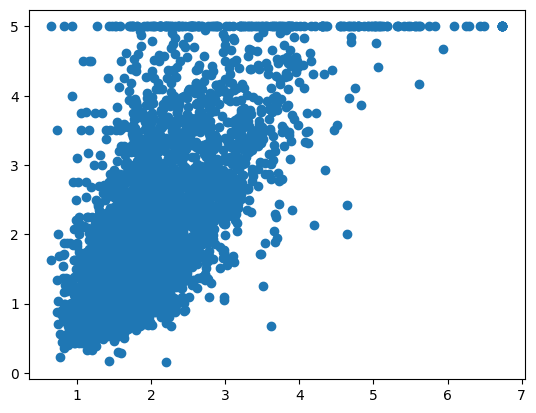

In [43]:
#visualizando graficamente

fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)

Na pratica não se utiliza apenas regressão linear simples, então vamos ver como é feita a regressão linear múltipla.

In [44]:
# Novamente separando X e y
X = casas[['MedInc','AveBedrms']]
y = casas.MedHouseVal

In [46]:
#separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#criando o modelo de regressão linear
reg = LinearRegression().fit(X_train, y_train) #X train ja tem duas colunas entao não precisa mais fazer o reshape


In [50]:
print(reg.coef_)
print(reg.intercept_)

[ 0.41928337 -0.00334004]
0.4484741980541518


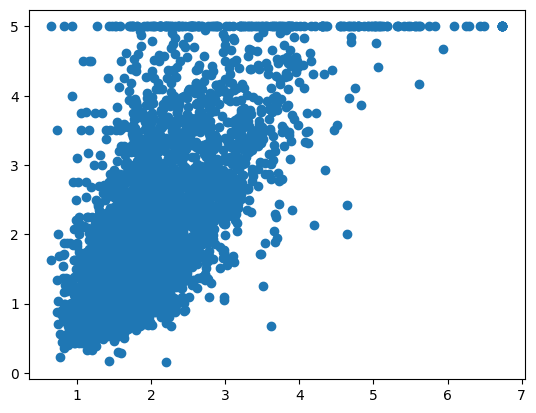

In [51]:
#visualizando graficamente

fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)

In [48]:
#avaliando o erro
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.629908653009376
0.7091157771765548


observa-se que utilizando as duas colunas os erros medios aumentaram, ou seja, a escolha de colunas é importante para o modelo

In [52]:
# o  melhor seria fazer 
X = casas.drop('MedHouseVal', axis=1)
# assim o X teria o mesmo tamanho do y